In [62]:
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt
import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v2')

from BB_MesoWest.MesoWest_percentiles import get_mesowest_percentiles

from matplotlib.dates import DateFormatter, HourLocator, MonthLocator
dateFmt = DateFormatter('%b')

import matplotlib as mpl 
mpl.rcParams['figure.figsize'] = [10, 5]
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['legend.scatterpoints'] = 1
mpl.rcParams['savefig.bbox'] = 'tight'

In [79]:
stn = 'UCC13'
variable = 'wind_gust'
percentiles = 'ALL'

a = get_mesowest_percentiles(stn, variable=variable, percentiles=percentiles, psource="PERCENTILES2")

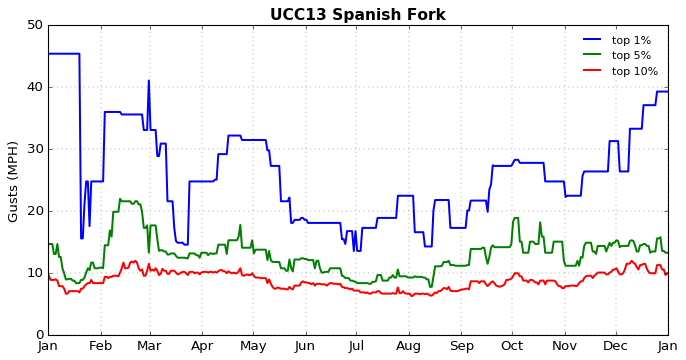

In [80]:
hr = 11
plt.plot(a['DATETIME'][hr::24], a['p99'][hr::24]*2.2369, label='top 1%')
plt.plot(a['DATETIME'][hr::24], a['p95'][hr::24]*2.2369, label='top 5%')
plt.plot(a['DATETIME'][hr::24], a['p90'][hr::24]*2.2369, label='top 10%')

plt.xlim([datetime(2016,1,1), datetime(2017,1,1)])
plt.ylim(ymin=0)
plt.grid()
plt.ylabel('Gusts (MPH)')
plt.title('%s %s' % (a['STID'], a['NAME']), fontweight='semibold')

ax = plt.gca()
legend = ax.legend(frameon=True, framealpha=.5)
legend.get_frame().set_linewidth(0)

ax.xaxis.set_major_locator(MonthLocator(bymonth=range(1,13)))
ax.xaxis.set_major_formatter(dateFmt)

plt.savefig('./%s_gust_percentile' % a['STID'])